In [229]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression


## to understand the data

In [230]:

rain_data=pd.read_csv("austin_weather.csv")
rain_data.describe()


,TempHighF,TempAvgF,TempLowF
count,1319.000000,1319.000000,1319.000000
mean,80.862775,70.642911,59.902957
std,14.766523,14.045904,14.190648
min,32.000000,29.000000,19.000000
25%,72.000000,62.000000,49.000000
50%,83.000000,73.000000,63.000000
75%,92.000000,83.000000,73.000000
max,107.000000,93.000000,81.000000


In [231]:
rain_data.columns

Index(['Date', 'TempHighF', 'TempAvgF', 'TempLowF', 'DewPointHighF',
       'DewPointAvgF', 'DewPointLowF', 'HumidityHighPercent',
       'HumidityAvgPercent', 'HumidityLowPercent',
       'SeaLevelPressureHighInches', 'SeaLevelPressureAvgInches',
       'SeaLevelPressureLowInches', 'VisibilityHighMiles',
       'VisibilityAvgMiles', 'VisibilityLowMiles', 'WindHighMPH', 'WindAvgMPH',
       'WindGustMPH', 'PrecipitationSumInches', 'Events'],
      dtype='object')

In [232]:
rain_data.sample(10)

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
307,2014-10-24,85,73,60,61,59,56,84,64,44,...,30.12,30.06,10,10,10,7,2,9,0,
230,2014-08-08,102,89,76,75,70,62,91,60,29,...,29.89,29.82,10,10,10,13,6,22,0,
373,2014-12-29,67,49,30,42,36,29,92,68,43,...,30.14,30.06,10,10,10,10,2,15,0,
491,2015-04-26,86,78,69,72,69,63,93,77,61,...,29.65,29.52,10,8,1,18,8,32,0.08,"Rain , Thunderstorm"
747,2016-01-07,73,61,49,53,50,46,100,71,41,...,29.9,29.81,10,5,0,9,2,13,0,Fog
379,2015-01-04,51,43,35,41,30,22,100,69,38,...,30.48,30.16,10,10,10,16,7,26,0,
1197,2017-04-01,76,71,65,65,63,59,93,79,64,...,29.82,29.77,10,10,10,16,8,26,0,
832,2016-04-01,66,59,51,52,45,38,72,57,42,...,29.97,29.76,10,9,2,21,8,37,0.34,"Rain , Thunderstorm"
259,2014-09-06,97,86,74,75,71,66,94,67,39,...,30.01,29.9,10,10,2,13,3,20,0.19,"Rain , Thunderstorm"
78,2014-03-09,58,49,39,45,39,31,86,71,55,...,30.29,30.22,10,9,2,15,5,23,0.11,Rain


In [233]:
rain_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Date                        1319 non-null   object
 1   TempHighF                   1319 non-null   int64 
 2   TempAvgF                    1319 non-null   int64 
 3   TempLowF                    1319 non-null   int64 
 4   DewPointHighF               1319 non-null   object
 5   DewPointAvgF                1319 non-null   object
 6   DewPointLowF                1319 non-null   object
 7   HumidityHighPercent         1319 non-null   object
 8   HumidityAvgPercent          1319 non-null   object
 9   HumidityLowPercent          1319 non-null   object
 10  SeaLevelPressureHighInches  1319 non-null   object
 11  SeaLevelPressureAvgInches   1319 non-null   object
 12  SeaLevelPressureLowInches   1319 non-null   object
 13  VisibilityHighMiles         1319 non-null   obje

In [234]:
rain_data["PrecipitationSumInches"].value_counts()


PrecipitationSumInches
0       870
T       124
0.01     45
0.02     30
0.04     10
       ... 
3.84      1
0.57      1
1.17      1
2.17      1
1.39      1
Name: count, Length: 114, dtype: int64

## Data cleanup

In [235]:
rain_data.replace('T',0.0,inplace=True) # because T is used in ddata to show very low value  valuev<<0.01
rain_data.replace('-',0.0,inplace=True) # - used in dataset to show missing data

In [236]:
print(rain_data["TempHighF"].unique())

[ 74  56  58  61  57  60  62  64  44  55  69  71  59  36  48  53  70  72
  75  67  76  82  63  40  39  49  65  80  46  32  38  86  81  83  77  52
  73  47  50  68  66  89  79  85  84  87  78  88  96  93  94  91  92  90
  95  97  98 100 101  99 102 104 103  51  41  45  54  42  43  37 105  34
 107 106]


In [237]:
rain_data.drop(columns=["SeaLevelPressureHighInches","SeaLevelPressureAvgInches","SeaLevelPressureLowInches","Date","Events"],inplace=True)

In [238]:
rain_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   TempHighF               1319 non-null   int64 
 1   TempAvgF                1319 non-null   int64 
 2   TempLowF                1319 non-null   int64 
 3   DewPointHighF           1319 non-null   object
 4   DewPointAvgF            1319 non-null   object
 5   DewPointLowF            1319 non-null   object
 6   HumidityHighPercent     1319 non-null   object
 7   HumidityAvgPercent      1319 non-null   object
 8   HumidityLowPercent      1319 non-null   object
 9   VisibilityHighMiles     1319 non-null   object
 10  VisibilityAvgMiles      1319 non-null   object
 11  VisibilityLowMiles      1319 non-null   object
 12  WindHighMPH             1319 non-null   object
 13  WindAvgMPH              1319 non-null   object
 14  WindGustMPH             1319 non-null   object
 15  Prec

## model feeding


In [239]:
x = rain_data.drop(columns=["PrecipitationSumInches"],axis=1)
y= rain_data["PrecipitationSumInches"].astype(float)
y=y.values.reshape(-1,1) # -1 means it wil automatically take it

In [240]:
print(y)

[[0.46]
 [0.  ]
 [0.  ]
 ...
 [0.  ]
 [0.  ]
 [0.  ]]


In [241]:
days=[i for i in range(len(y))]
print(days)


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [242]:
clf=LinearRegression()

clf.fit(x,y)

LinearRegression()

## visualizing the model

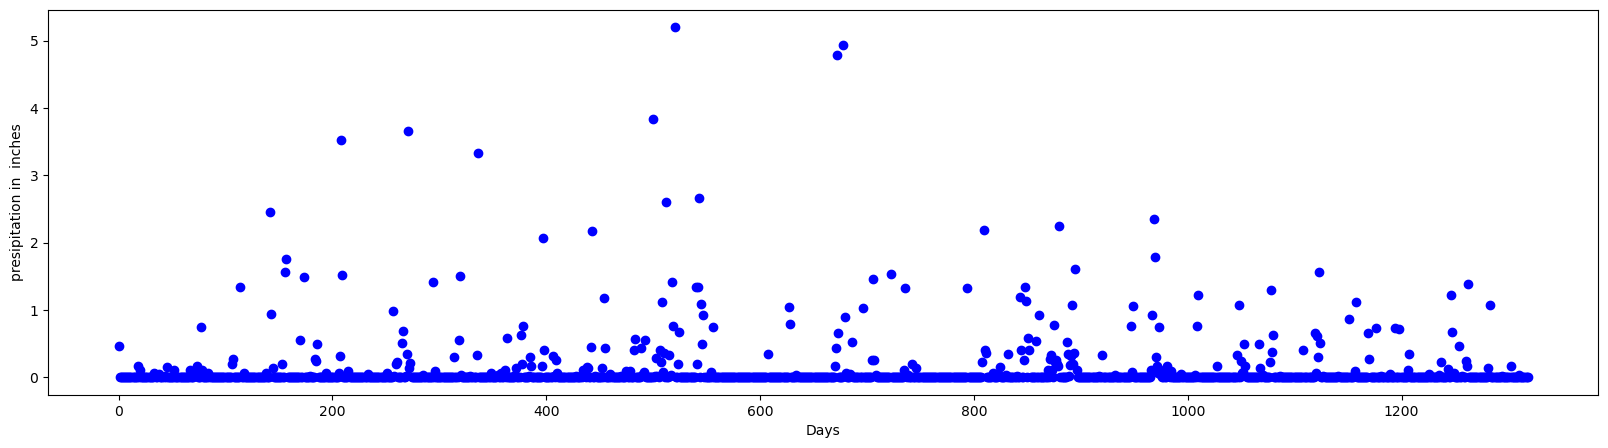

In [243]:
plt.figure(figsize=(20,5))  # Width=12 inches, Height=5 inches
plt.scatter(days,y,color="blue",label="Actual Data")
# plt.scatter(days,clf.predict(x),color="red",label="Actual Data")
plt.xlabel("Days")
plt.ylabel("presipitation in  inches")
plt.show()

prefiction vs all atributes graph 


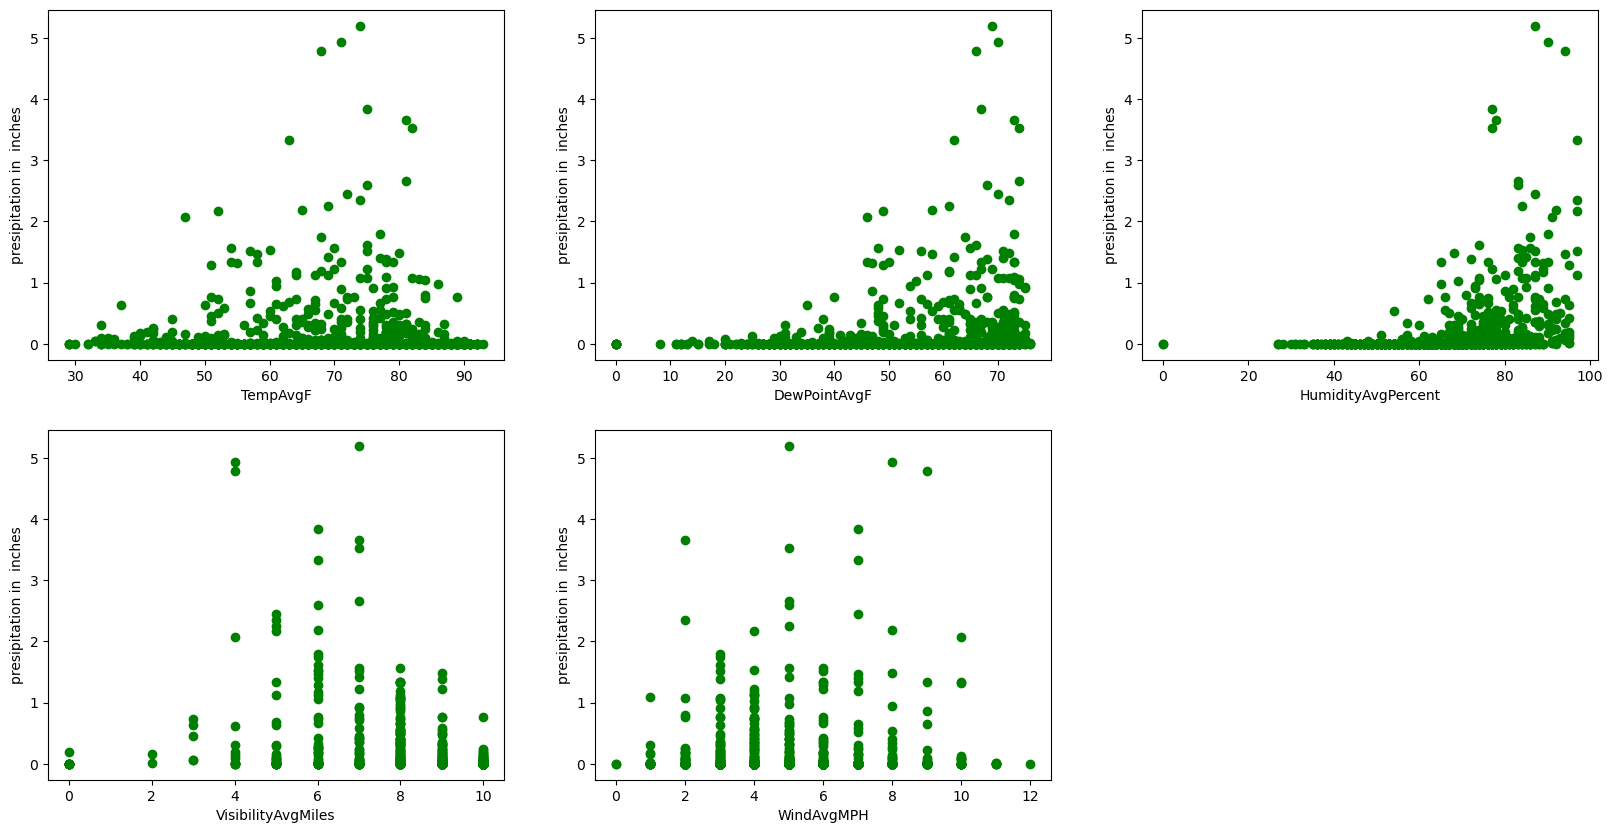

In [244]:
print("prefiction vs all atributes graph ")
columns_data = ['TempAvgF','DewPointAvgF', 'HumidityAvgPercent',  'VisibilityAvgMiles', 'WindAvgMPH']
plt.figure(figsize=(20,10))  # Width=20 inches, Height=10 inches
for i in range(len(columns_data)):
    plt.subplot(2,3,i+1)
    x_axis_data=[float(j) for j in x[columns_data[i]]]
    plt.scatter(x_axis_data,y.reshape(-1),color="green",label="Actual Data")
    plt.xlabel(columns_data[i])
    plt.ylabel("presipitation in  inches")
plt.show()
#the below graph shows the temp,dew point and the humidity has a positive correlation with the precipitation

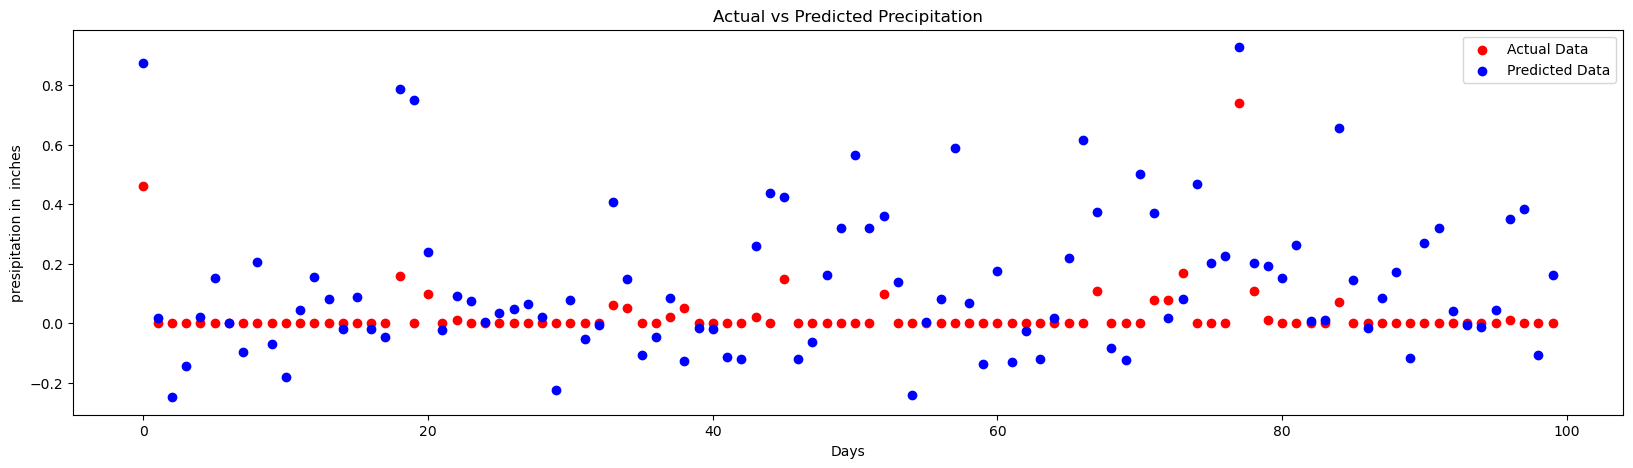

In [245]:
# y=y.reshape(-1)
# print(y.shape)
# print(days)
# print(y)
plt.figure(figsize=(20,5))  # Width=12 inches, Height=5 inches
plt.scatter(days[:100],y[:100],color="red",label="Actual Data")
plt.scatter(days[:100],clf.predict(x)[:100],color="blue",label="Predicted Data")
plt.xlabel("Days")
plt.legend()
plt.ylabel("presipitation in  inches")
plt.title("Actual vs Predicted Precipitation")
plt.show()

In [246]:
import xgboost
from xgboost import XGBRegressor
model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6)
for i in range(len(x.columns)):
    if x[x.columns[i]].dtype == 'object':
        x[x.columns[i]] = x[x.columns[i]].astype(int)
print(x.dtypes)
model.fit(x,y)

TempHighF              int64
TempAvgF               int64
TempLowF               int64
DewPointHighF          int32
DewPointAvgF           int32
DewPointLowF           int32
HumidityHighPercent    int32
HumidityAvgPercent     int32
HumidityLowPercent     int32
VisibilityHighMiles    int32
VisibilityAvgMiles     int32
VisibilityLowMiles     int32
WindHighMPH            int32
WindAvgMPH             int32
WindGustMPH            int32
dtype: object


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

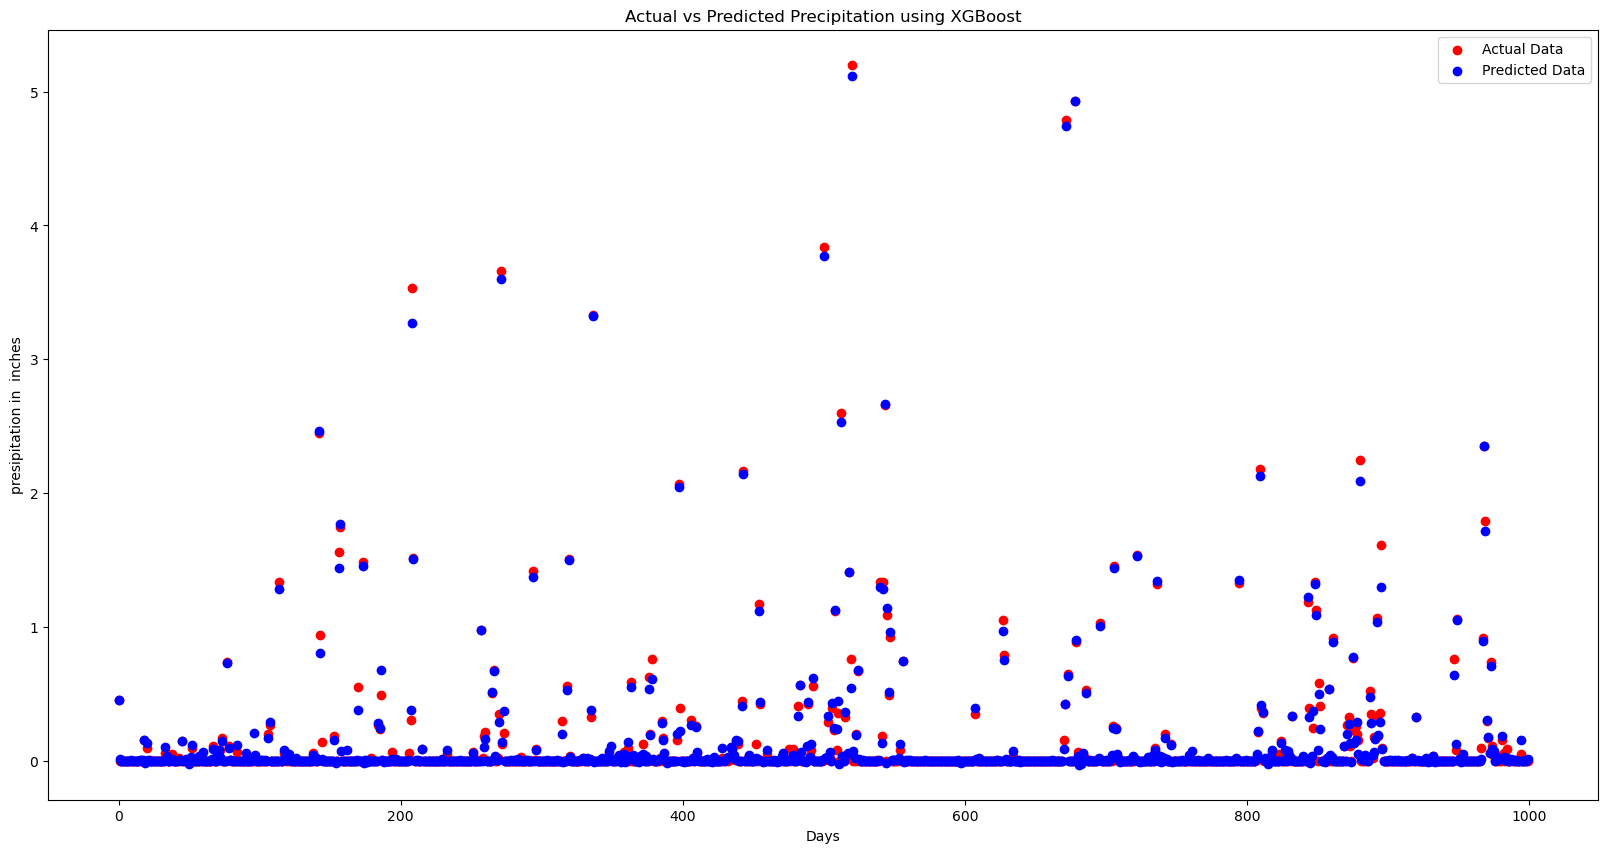

In [249]:
plt.figure(figsize=(20,10))  # Width=20 inches, Height=10 inches
plt.scatter(days[:1000],y[:1000],color="red",label="Actual Data")
plt.scatter(days[:1000],model.predict(x)[:1000],color="blue",label="Predicted Data")
plt.xlabel("Days")
plt.ylabel("presipitation in  inches")
plt.title("Actual vs Predicted Precipitation using XGBoost")
plt.legend()
plt.show()
# we can see that xgboost is better in predicting the resut then linear regression  because data is highly non linear 